# **Homework 5**
Josh Winnes

October 29, 2024

***Specifications***

- download the voice features

- run clustering on the voice clips, using only the voice features, do not include the demographic features of the clips

- using the elbow method to find the most suitable k for k-means clustering

- explore using different subsets of the voice features for clustering and observe the differences

- try different clustering methods

***Deliverables***
- self contained python jupyter notebook that implements the specifications. 

***Planning for unit project***

start to think about a project you would like to do, the overarching theme of the project is to conduct predictive analytics on voice data, for instance, to design and implement a “speaker attribute classifier”: given a speaker’s voice recordings, “predict” the speaker attributes. Potential attributes to consider include: accents, speaking rate. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Audio
import librosa
import librosa.display
import scipy

import os

data_dir = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data/voice_clip_selected/'
os.chdir(data_dir)
voice_clip_meta_data = pd.read_csv("voice_feature_20241022.csv")

### Code to prep data file

In [2]:
voice_clip_meta_data.head()

f0_mean     f0_std       f0_var      f0_min      f0_max   f0_skew  \
0  148.104476  28.297353   800.740162   98.851402  244.810709  0.944129   
1  179.445817  58.340342  3403.595457  108.422687  352.266349  1.689793   
2  164.328685  31.545504   995.118832  120.999409  270.069989  1.420956   
3  189.950775  43.507088  1892.866742  127.456063  377.549725  2.154458   
4  151.709046  24.508886   600.685503  100.579294  250.532888  1.246426   

   f0_kurtosis  zcr_mean   zcr_std   zcr_var  ...  \
0     1.336574  0.054803  0.047640  0.002270  ...   
1     2.507009  0.078192  0.056876  0.003235  ...   
2     2.301650  0.081051  0.060591  0.003671  ...   
3     6.023298  0.095945  0.070520  0.004973  ...   
4     2.390260  0.059913  0.065133  0.004242  ...   

                                         sentence_id  \
0  1ecd9b2843ef0da42b512aad498414714c86d3cadb2910...   
1  1e8739c456e984b8d86652c0275a34826597063896e98b...   
2  1ef6553bf88ea2751ceeadd7e993246f073fc9587ad762...   
3  1f1340137eb2937a87b7f2ea5306f56a04a2eaf6091ab8...   
4  82ad00fd14a2eeec195d03a6ad1c7e466d0f061317881f...   

                                            sentence  up_votes  down_votes  \
0  Sheila was cremated, and the casket with her a...         2           0   
1  From each heat, the entrants are whittled down...         2           0   
2  A cemetery encircles the square, leading to th...         2           0   
3  The village is also significant for its well-p...         2           0   
4  Myers is faculty member at the Perimeter Insti...         2           0   

         age           gender          accents  len_in_second  sampling_rate  \
0  seventies  female_feminine              NaN          9.048          48000   
1  seventies  female_feminine              NaN          5.472          48000   
2  seventies  female_feminine              NaN          7.128          48000   
3  seventies  female_feminine              NaN          5.712          48000   
4  seventies   male_masculine  England English          8.460          32000   

   array_size  
0      434304  
1      262656  
2      342144  
3      274176  
4      270720  

[5 rows x 51 columns]

### Using K-Means Clustering to Classify Voice Files

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

def find_elbow(df, colnames, clusters_range):
    df_for_cluster = df.loc[:,colnames]
    stscaler = StandardScaler().fit(df_for_cluster)
    normalized_df = stscaler.transform(df_for_cluster)

    inertias = [] # wcss: Within Cluster Sum of Squares
    for k in clusters_range:
        kmeans = KMeans(init='k-means++',n_clusters=k,n_init=100, max_iter=300, random_state=0).fit(normalized_df)
        inertias.append(kmeans.inertia_)
    plt.figure()
    plt.plot(clusters_range,inertias, marker='o')
    plt.title('Elbow method for deciding on k')
    plt.xlabel('Number of clusters: k')
    plt.ylabel('inertia')
    plt.show()
    return

def run_kmeans(df, colnames, k):
    df_for_cluster = df.loc[:,colnames]
    stscaler = StandardScaler().fit(df_for_cluster)
    normalized_df = stscaler.transform(df_for_cluster)

    kmeans = KMeans(init='k-means++',n_clusters=k,n_init=100, max_iter=300, random_state=0).fit(normalized_df)
    df['cluster'] = kmeans.labels_
    return df

In [4]:
voice_clip_meta_data.isna().sum()

f0_mean            15
f0_std             15
f0_var             15
f0_min             15
f0_max             15
f0_skew            16
f0_kurtosis        16
zcr_mean            0
zcr_std             0
zcr_var             0
zcr_min             0
zcr_max             0
zcr_skew            0
zcr_kurtosis        0
mfcc_00             0
mfcc_01             0
mfcc_02             0
mfcc_03             0
mfcc_04             0
mfcc_05             0
mfcc_06             0
mfcc_07             0
mfcc_08             0
mfcc_09             0
mfcc_10             0
mfcc_11             0
mfcc_12             0
mfcc_13             0
mfcc_14             0
mfcc_15             0
mfcc_16             0
mfcc_17             0
mfcc_18             0
mfcc_19             0
mfcc_20             0
mfcc_21             0
mfcc_22             0
mfcc_23             0
mfcc_24             0
client_id           0
path                0
sentence_id         0
sentence            0
up_votes            0
down_votes          0
age       

In [5]:

voice_clip_meta_data.dropna(subset = ['f0_kurtosis'],axis=0, inplace=True)
voice_clip_meta_data['accents'].fillna(value = 'None', inplace=True)
voice_clip_meta_data.isna().nunique()


/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_8096/2470951236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  voice_clip_meta_data['accents'].fillna(value = 'None', inplace=True)


f0_mean          1
f0_std           1
f0_var           1
f0_min           1
f0_max           1
f0_skew          1
f0_kurtosis      1
zcr_mean         1
zcr_std          1
zcr_var          1
zcr_min          1
zcr_max          1
zcr_skew         1
zcr_kurtosis     1
mfcc_00          1
mfcc_01          1
mfcc_02          1
mfcc_03          1
mfcc_04          1
mfcc_05          1
mfcc_06          1
mfcc_07          1
mfcc_08          1
mfcc_09          1
mfcc_10          1
mfcc_11          1
mfcc_12          1
mfcc_13          1
mfcc_14          1
mfcc_15          1
mfcc_16          1
mfcc_17          1
mfcc_18          1
mfcc_19          1
mfcc_20          1
mfcc_21          1
mfcc_22          1
mfcc_23          1
mfcc_24          1
client_id        1
path             1
sentence_id      1
sentence         1
up_votes         1
down_votes       1
age              1
gender           1
accents          1
len_in_second    1
sampling_rate    1
array_size       1
dtype: int64

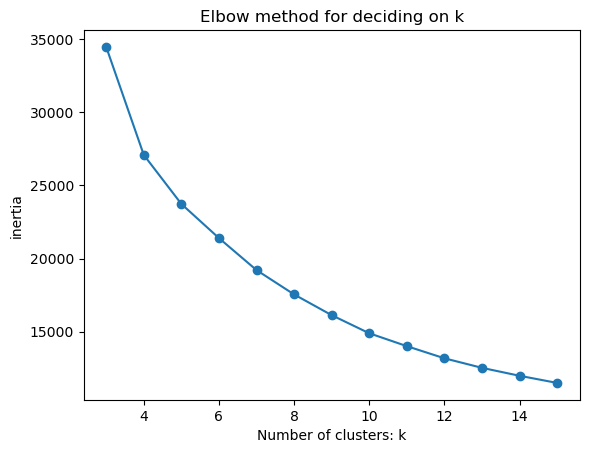

In [6]:
columns = ['f0_mean', 'f0_min', 'f0_max', 'zcr_mean']
clusters_range = [3,4,5,6,7,8,9,10,11,12,13,14,15]
find_elbow(df=voice_clip_meta_data, colnames=columns,clusters_range=clusters_range)

looks like we could use k = 4, k = 6, or k = 8 so I'll just use them all and see what I like better

### **Using K=4**

In [7]:
k = 4
voice_clip_meta_data_4 = run_kmeans(voice_clip_meta_data, columns, k)

In [8]:
voice_clip_meta_data_4.cluster.value_counts()

cluster
2    7475
1    5194
0    2980
3    1045
Name: count, dtype: int64

In [9]:
voice_clip_meta_data_4_0 = voice_clip_meta_data_4[voice_clip_meta_data_4['cluster']==0]
voice_clip_meta_data_4_1 = voice_clip_meta_data_4[voice_clip_meta_data_4['cluster']==1]
voice_clip_meta_data_4_2 = voice_clip_meta_data_4[voice_clip_meta_data_4['cluster']==2]
voice_clip_meta_data_4_3 = voice_clip_meta_data_4[voice_clip_meta_data_4['cluster']==3]

In [10]:
voice_clip_meta_data_4.columns

Index(['f0_mean', 'f0_std', 'f0_var', 'f0_min', 'f0_max', 'f0_skew',
       'f0_kurtosis', 'zcr_mean', 'zcr_std', 'zcr_var', 'zcr_min', 'zcr_max',
       'zcr_skew', 'zcr_kurtosis', 'mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03',
       'mfcc_04', 'mfcc_05', 'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09',
       'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15',
       'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21',
       'mfcc_22', 'mfcc_23', 'mfcc_24', 'client_id', 'path', 'sentence_id',
       'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accents',
       'len_in_second', 'sampling_rate', 'array_size', 'cluster'],
      dtype='object')

In [11]:
voice_clip_meta_data_4_0.gender.value_counts()

gender
female_feminine    2447
male_masculine      533
Name: count, dtype: int64

In [12]:
voice_clip_meta_data_4_1.gender.value_counts()

gender
male_masculine     4596
female_feminine     598
Name: count, dtype: int64

In [13]:
voice_clip_meta_data_4_2.gender.value_counts()

gender
male_masculine     6651
female_feminine     824
Name: count, dtype: int64

In [14]:
voice_clip_meta_data_4_3.gender.value_counts()

gender
male_masculine     536
female_feminine    509
Name: count, dtype: int64

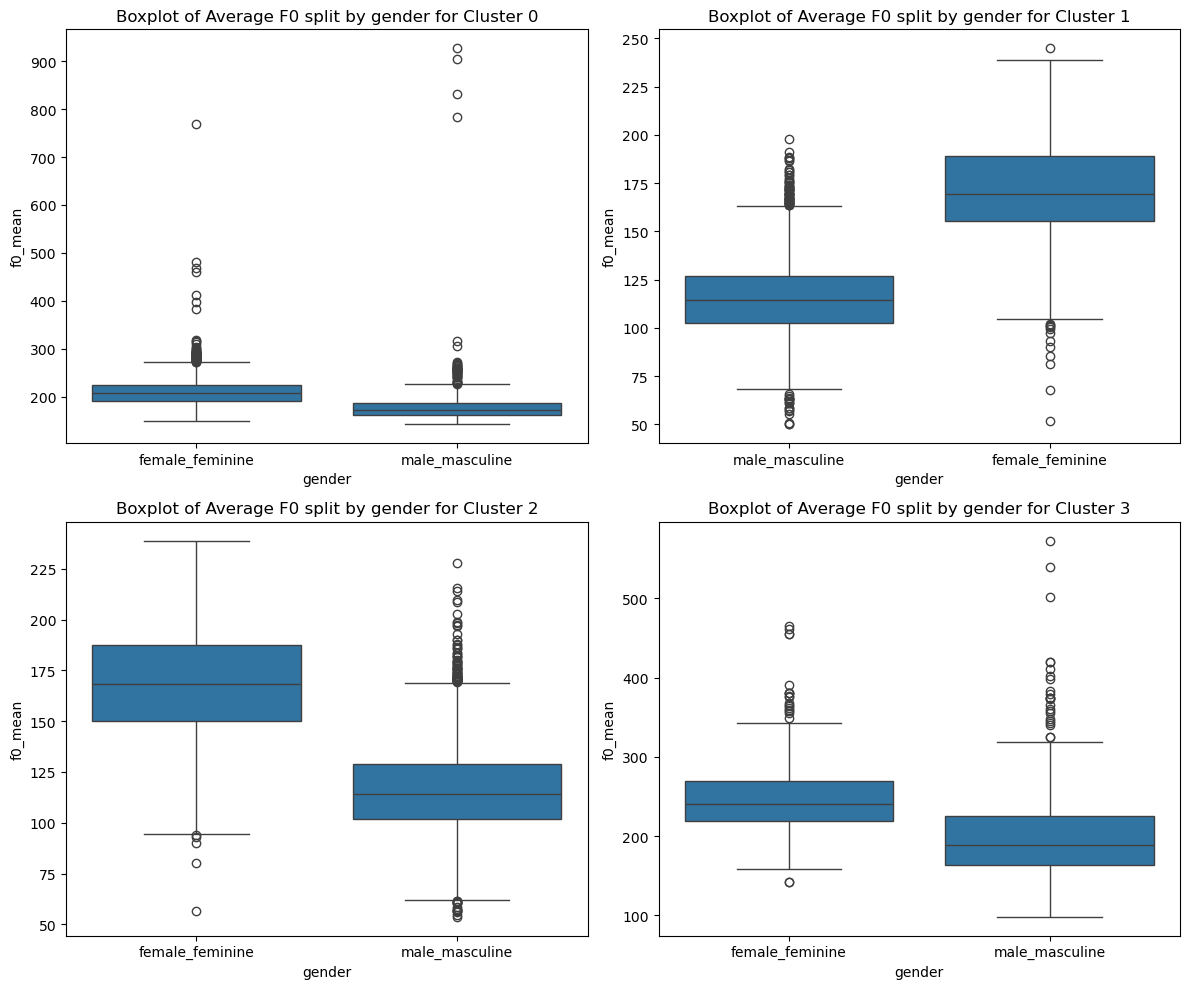

In [15]:
# Example DataFrames (replace these with your actual DataFrames)
# df1, df2, df3, df4 should be your DataFrames

# List of DataFrames and the column to plot
dataframes = [voice_clip_meta_data_4_0, voice_clip_meta_data_4_1, voice_clip_meta_data_4_2, voice_clip_meta_data_4_3]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each DataFrame on a separate subplot
for ax, df, col in zip(axes, dataframes, columns):
    cluster = df['cluster'].min()
    sns.boxplot(data=df, x='gender', y='f0_mean', ax=ax)
    ax.set_title(f'Boxplot of Average F0 split by gender for Cluster {cluster}')

plt.tight_layout()
plt.show()

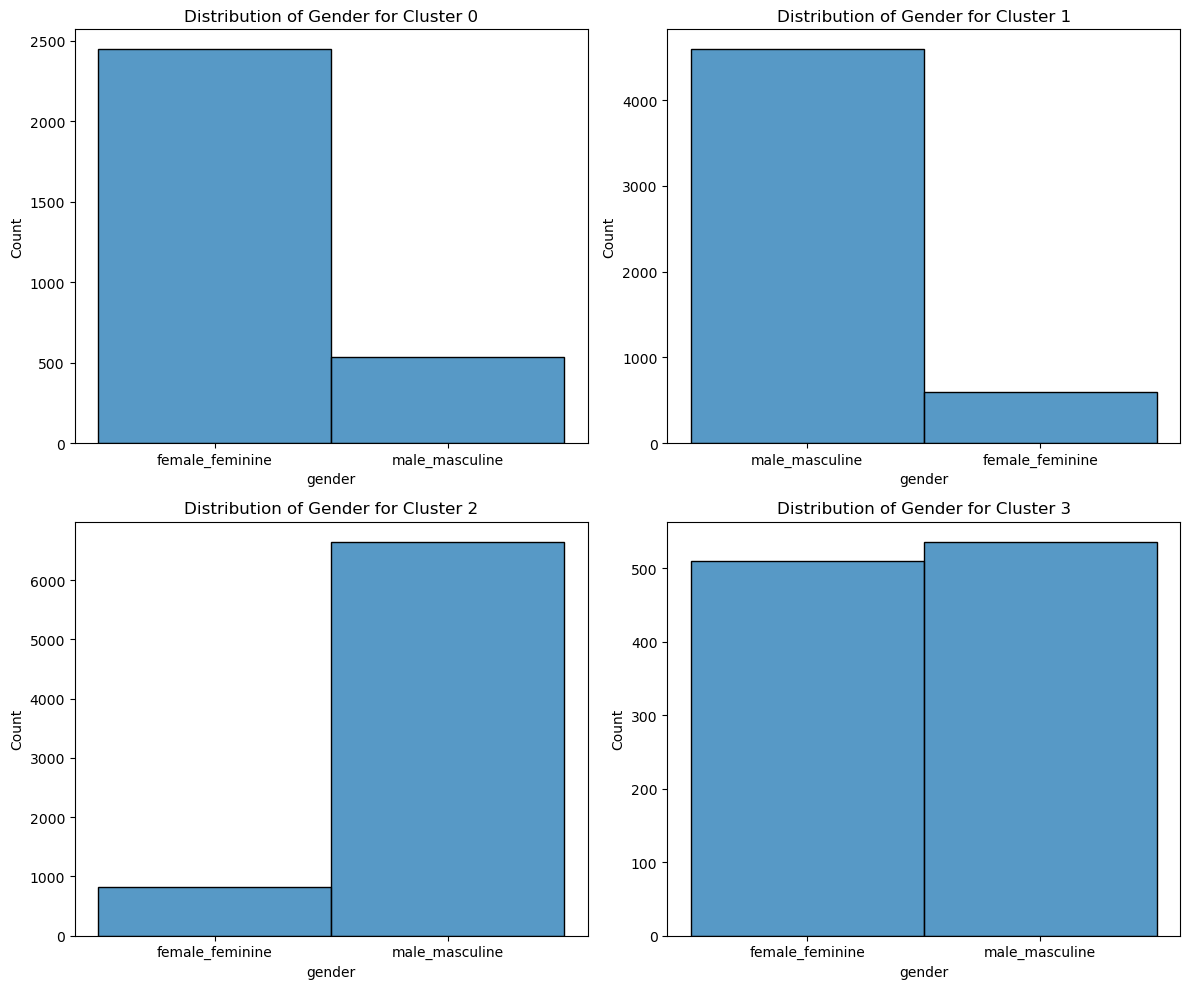

In [16]:
# Example DataFrames (replace these with your actual DataFrames)
# df1, df2, df3, df4 should be your DataFrames

# List of DataFrames and the column to plot
dataframes = [voice_clip_meta_data_4_0, voice_clip_meta_data_4_1, voice_clip_meta_data_4_2, voice_clip_meta_data_4_3]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each DataFrame on a separate subplot
for ax, df, col in zip(axes, dataframes, columns):
    cluster = df['cluster'].min()
    sns.histplot(data=df, x='gender', ax=ax)
    ax.set_title(f'Distribution of Gender for Cluster {cluster}')

plt.tight_layout()
plt.show()

We see that k = 0 pretty much splits the voice data into gender and fundamental frequency. Cluster 0 is primarily high pitched female and male voices. Cluster 1 is primarily mid-pitched male voices and some lower pitched female voices. Cluster 2 is the same as cluster 1 except even lower, and Cluster 3 seems like its actually a pretty even split with really high voices.

### **Using K=6**

In [17]:
k = 6
voice_clip_meta_data_6 = run_kmeans(voice_clip_meta_data, columns, k)

In [18]:
voice_clip_meta_data_6.cluster.value_counts()

cluster
4    4733
2    4697
1    2997
5    1654
0    1653
3     960
Name: count, dtype: int64

In [19]:
voice_clip_meta_data_6_0 = voice_clip_meta_data_6[voice_clip_meta_data_6['cluster']==0]
voice_clip_meta_data_6_1 = voice_clip_meta_data_6[voice_clip_meta_data_6['cluster']==1]
voice_clip_meta_data_6_2 = voice_clip_meta_data_6[voice_clip_meta_data_6['cluster']==2]
voice_clip_meta_data_6_3 = voice_clip_meta_data_6[voice_clip_meta_data_6['cluster']==3]
voice_clip_meta_data_6_4 = voice_clip_meta_data_6[voice_clip_meta_data_6['cluster']==4]
voice_clip_meta_data_6_5 = voice_clip_meta_data_6[voice_clip_meta_data_6['cluster']==5]

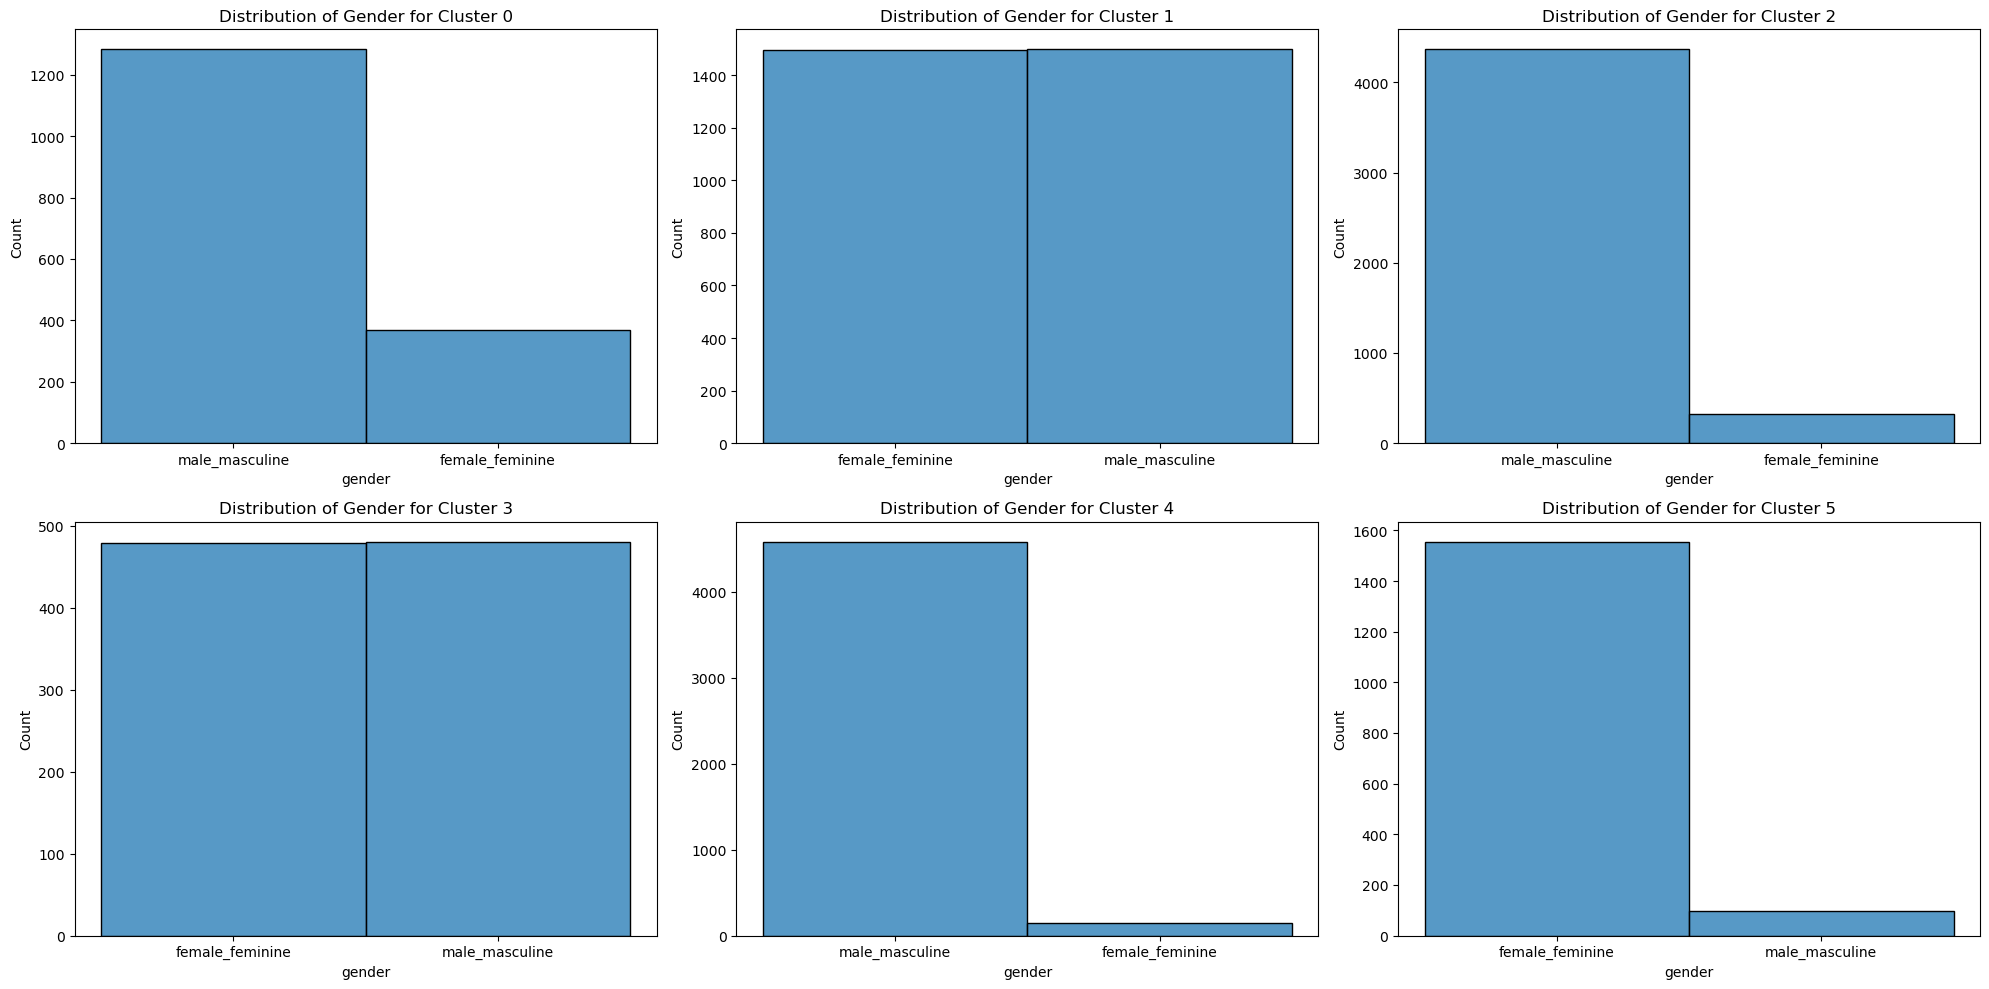

In [20]:
# Example DataFrames (replace these with your actual DataFrames)
# df1, df2, df3, df4 should be your DataFrames

# List of DataFrames and the column to plot
dataframes = [voice_clip_meta_data_6_0, voice_clip_meta_data_6_1, voice_clip_meta_data_6_2, voice_clip_meta_data_6_3, voice_clip_meta_data_6_4, voice_clip_meta_data_6_5]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each DataFrame on a separate subplot
for ax, df in zip(axes, dataframes):
    cluster = df['cluster'].min()
    sns.histplot(data=df, x='gender', ax=ax)
    ax.set_title(f'Distribution of Gender for Cluster {cluster}')

plt.tight_layout()
plt.show()

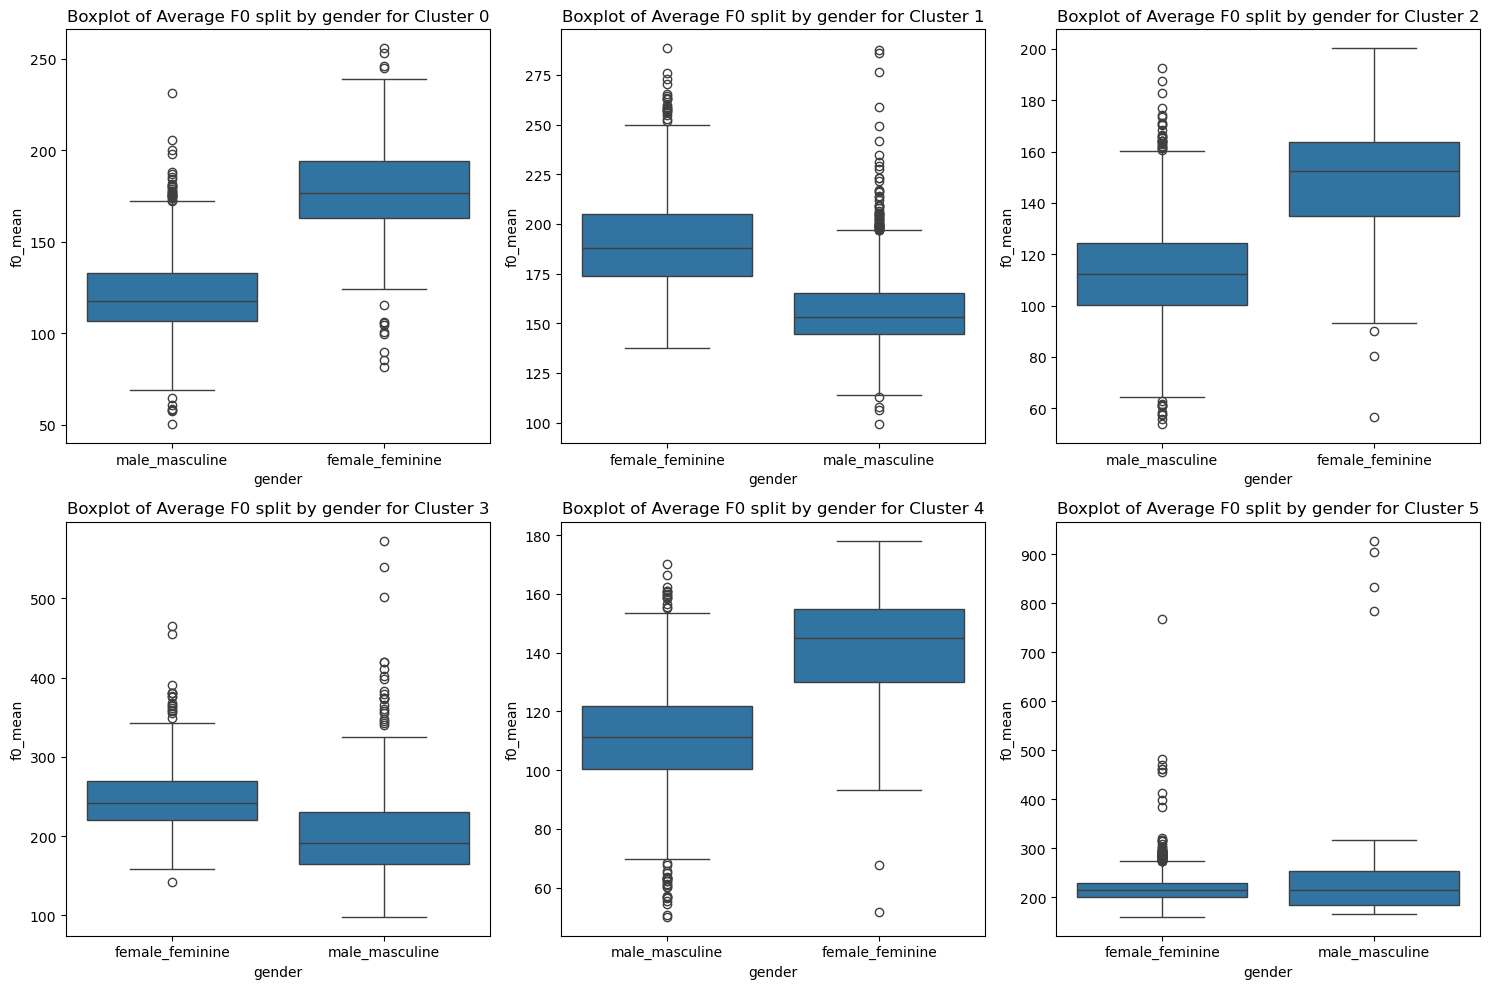

In [21]:
# Example DataFrames (replace these with your actual DataFrames)
# df1, df2, df3, df4 should be your DataFrames

# List of DataFrames and the column to plot
dataframes = [voice_clip_meta_data_6_0, voice_clip_meta_data_6_1, voice_clip_meta_data_6_2, voice_clip_meta_data_6_3, voice_clip_meta_data_6_4, voice_clip_meta_data_6_5]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each DataFrame on a separate subplot
for ax, df in zip(axes, dataframes):
    cluster = df['cluster'].min()
    sns.boxplot(data=df, x='gender', y='f0_mean', ax=ax)
    ax.set_title(f'Boxplot of Average F0 split by gender for Cluster {cluster}')

plt.tight_layout()
plt.show()

In [22]:
voice_clip_meta_data_6_5.columns

Index(['f0_mean', 'f0_std', 'f0_var', 'f0_min', 'f0_max', 'f0_skew',
       'f0_kurtosis', 'zcr_mean', 'zcr_std', 'zcr_var', 'zcr_min', 'zcr_max',
       'zcr_skew', 'zcr_kurtosis', 'mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03',
       'mfcc_04', 'mfcc_05', 'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09',
       'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15',
       'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21',
       'mfcc_22', 'mfcc_23', 'mfcc_24', 'client_id', 'path', 'sentence_id',
       'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accents',
       'len_in_second', 'sampling_rate', 'array_size', 'cluster'],
      dtype='object')

It looks like with k = 6, the model is essentially splitting by gender again with the exception of clusters 1 and 3. Cluster 1 seems to be middle pitched men and women that sound similar while cluster 3 is the really high voices that sound similar.

### **Using K=8**

In [23]:
k = 8
voice_clip_meta_data_8 = run_kmeans(voice_clip_meta_data, columns, k)

voice_clip_meta_data_8_0 = voice_clip_meta_data_8[voice_clip_meta_data_8['cluster']==0]
voice_clip_meta_data_8_1 = voice_clip_meta_data_8[voice_clip_meta_data_8['cluster']==1]
voice_clip_meta_data_8_2 = voice_clip_meta_data_8[voice_clip_meta_data_8['cluster']==2]
voice_clip_meta_data_8_3 = voice_clip_meta_data_8[voice_clip_meta_data_8['cluster']==3]
voice_clip_meta_data_8_4 = voice_clip_meta_data_8[voice_clip_meta_data_8['cluster']==4]
voice_clip_meta_data_8_5 = voice_clip_meta_data_8[voice_clip_meta_data_8['cluster']==5]
voice_clip_meta_data_8_6 = voice_clip_meta_data_8[voice_clip_meta_data_8['cluster']==6]
voice_clip_meta_data_8_7 = voice_clip_meta_data_8[voice_clip_meta_data_8['cluster']==7]

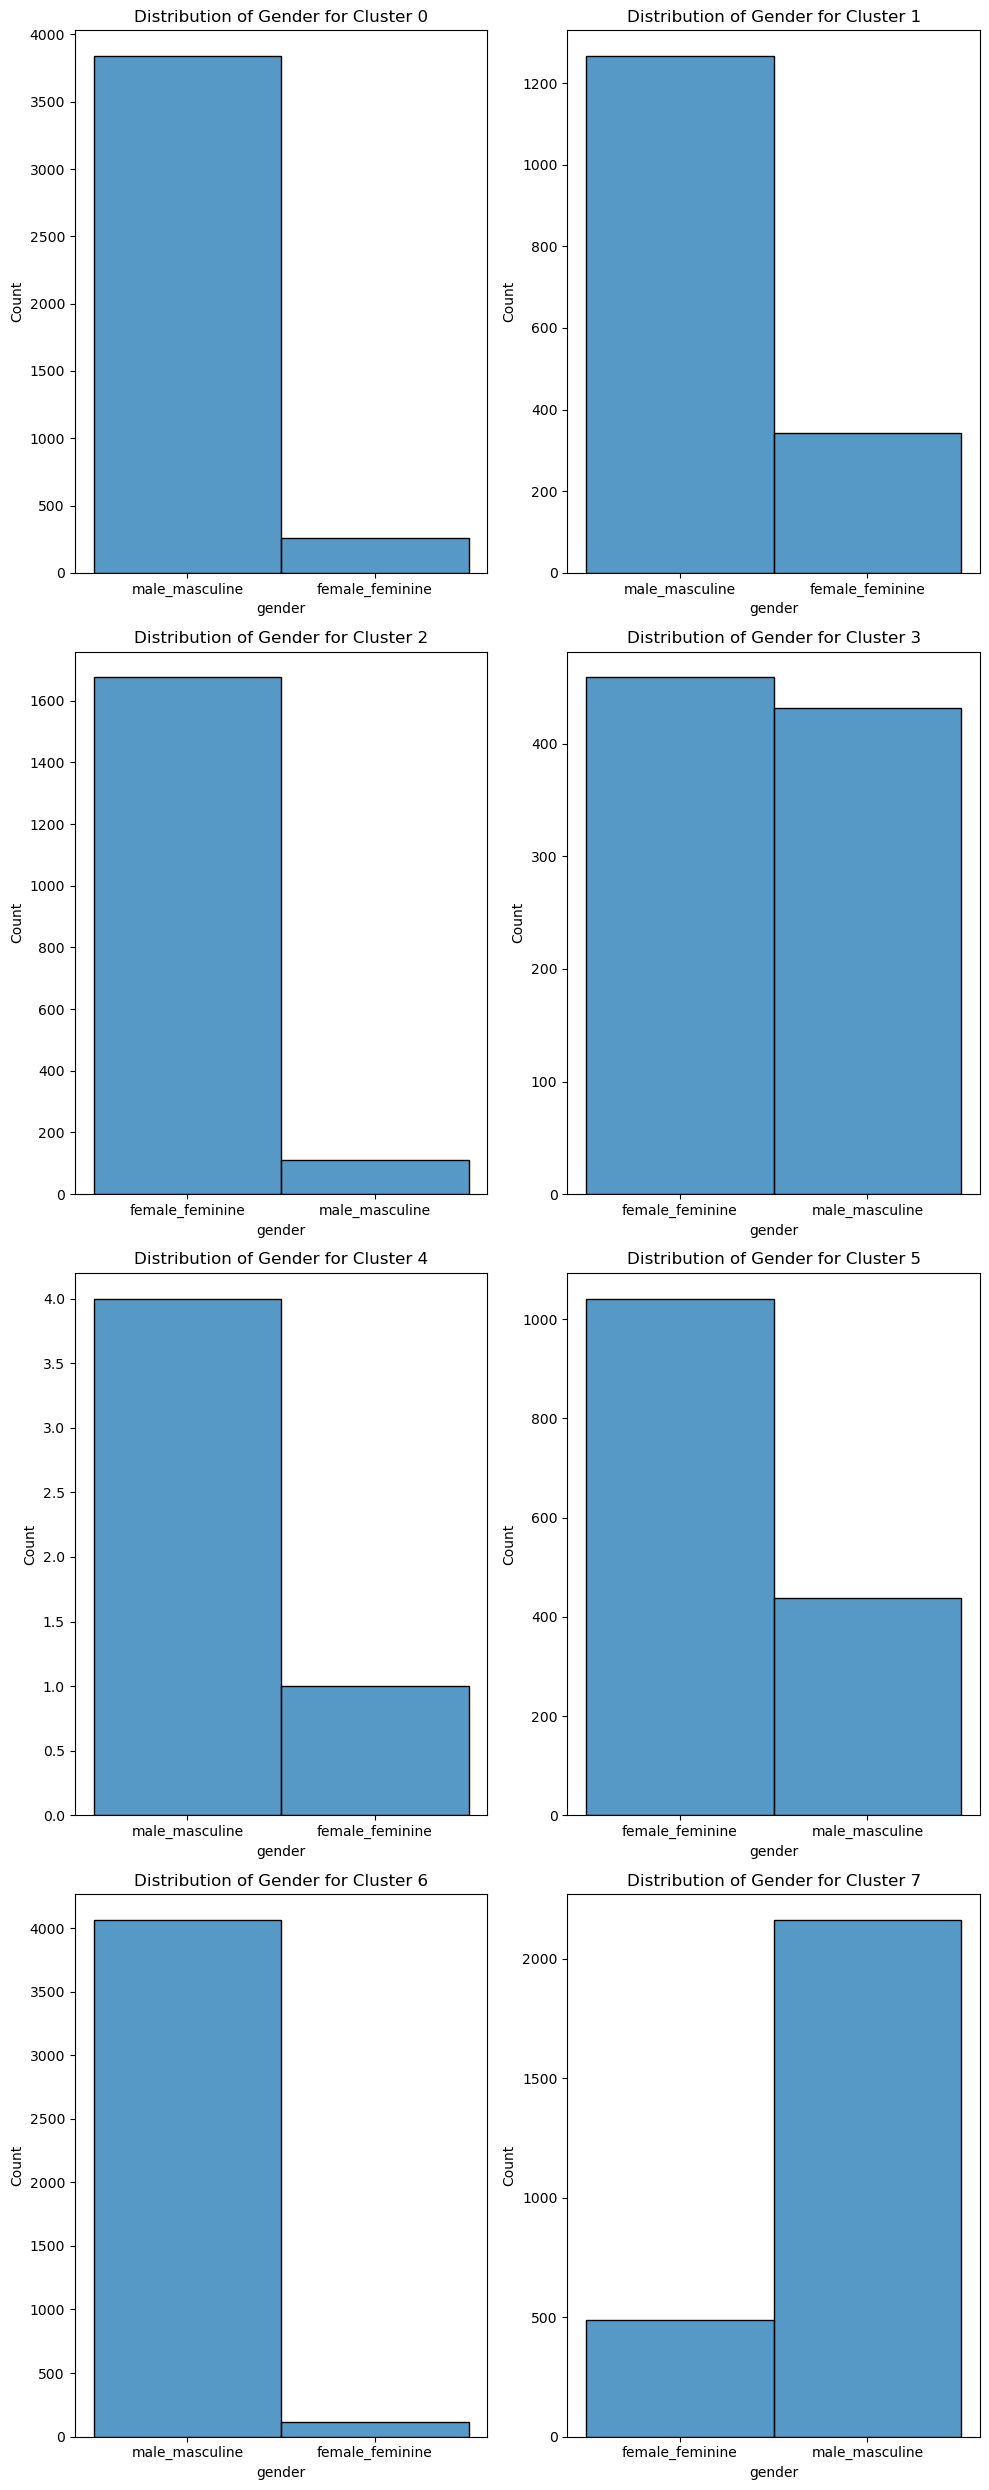

In [24]:
# Example DataFrames (replace these with your actual DataFrames)
# df1, df2, df3, df4 should be your DataFrames

# List of DataFrames and the column to plot
dataframes = [voice_clip_meta_data_8_0, voice_clip_meta_data_8_1, voice_clip_meta_data_8_2, voice_clip_meta_data_8_3, voice_clip_meta_data_8_4, voice_clip_meta_data_8_5, voice_clip_meta_data_8_6, voice_clip_meta_data_8_7]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each DataFrame on a separate subplot
for ax, df in zip(axes, dataframes):
    cluster = df['cluster'].min()
    sns.histplot(data=df, x='gender', ax=ax)
    ax.set_title(f'Distribution of Gender for Cluster {cluster}')

plt.tight_layout()
plt.show()

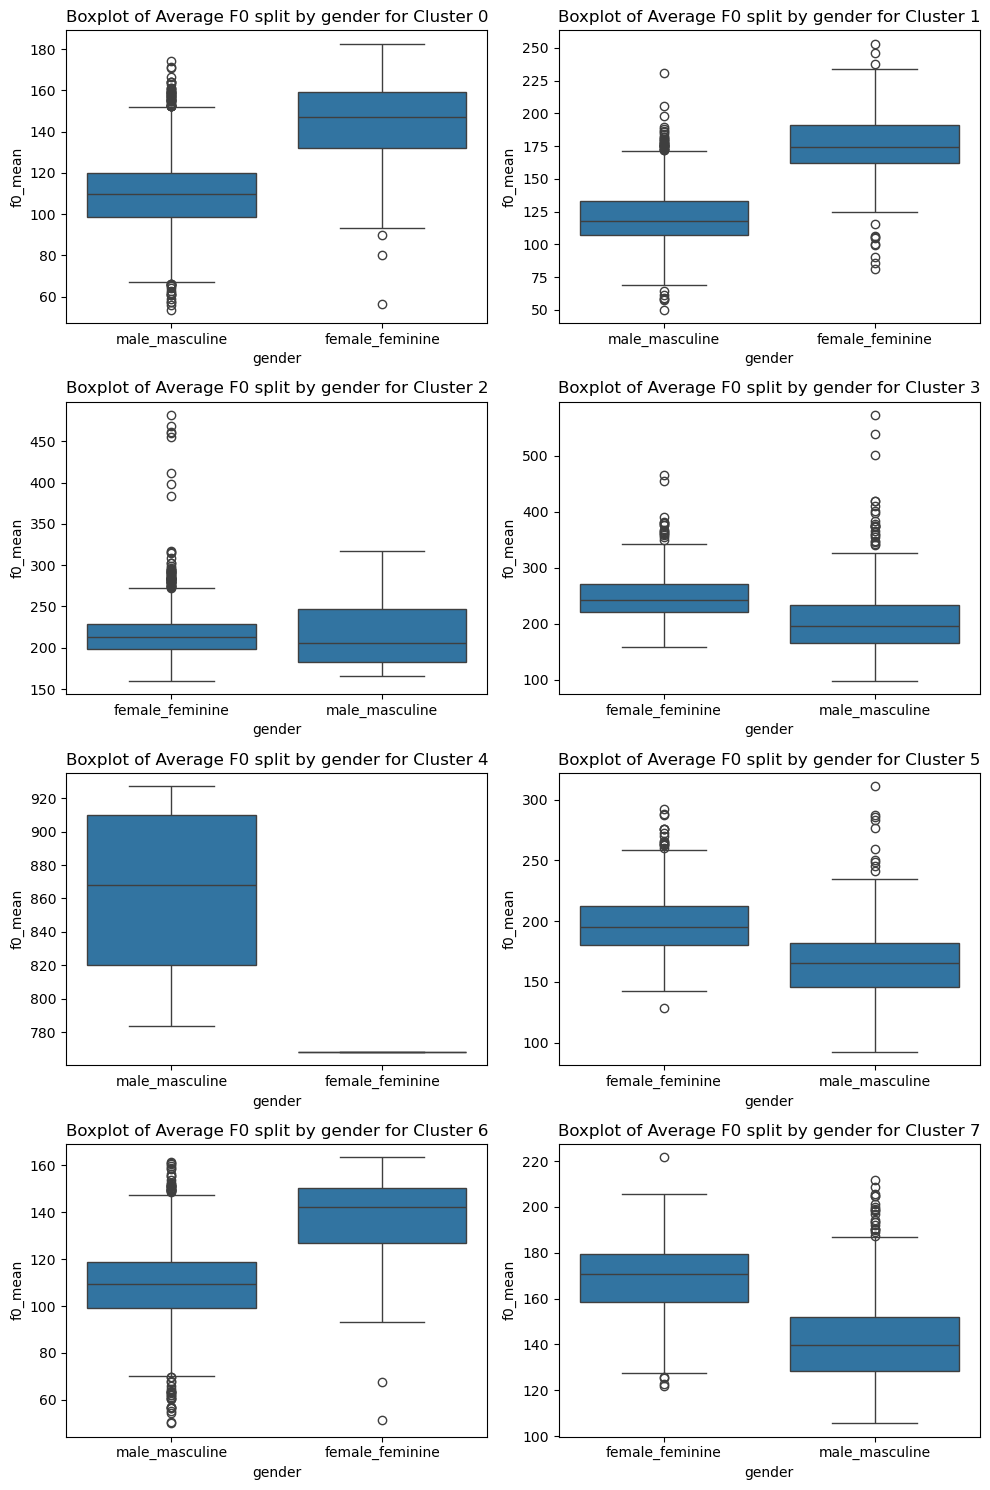

In [25]:
# Example DataFrames (replace these with your actual DataFrames)
# df1, df2, df3, df4 should be your DataFrames

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each DataFrame on a separate subplot
for ax, df in zip(axes, dataframes):
    cluster = df['cluster'].min()
    sns.boxplot(data=df, x='gender', y='f0_mean', ax=ax)
    ax.set_title(f'Boxplot of Average F0 split by gender for Cluster {cluster}')

plt.tight_layout()
plt.show()

K = 8 doesn't seem to do a better job than K = 6 at splitting voice data by gender so I'd recommend using K=6.

### **Exploring the Clusters**

In [28]:
audiofiles_0 = voice_clip_meta_data_6_0['path'].to_list()
audiofiles_1 = voice_clip_meta_data_6_1['path'].to_list()
audiofiles_2 = voice_clip_meta_data_6_2['path'].to_list()
audiofiles_3 = voice_clip_meta_data_6_3['path'].to_list()
audiofiles_4 = voice_clip_meta_data_6_4['path'].to_list()
audiofiles_5 = voice_clip_meta_data_6_5['path'].to_list()

#### Cluster 0

In [29]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_0[0])
Audio(data=x, rate=sr)

In [30]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_0[10])
Audio(data=x, rate=sr)

In [31]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_0[100])
Audio(data=x, rate=sr)

In [32]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_0[50])
Audio(data=x, rate=sr)

Cluster 1

In [33]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_1[0])
Audio(data=x, rate=sr)

In [37]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_1[10])
Audio(data=x, rate=sr)

In [38]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_1[100])
Audio(data=x, rate=sr)

In [39]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_1[50])
Audio(data=x, rate=sr)

Cluster 2

In [40]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_2[0])
Audio(data=x, rate=sr)

In [41]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_2[10])
Audio(data=x, rate=sr)

In [42]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_2[100])
Audio(data=x, rate=sr)

In [43]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_2[50])
Audio(data=x, rate=sr)

Cluster 3

In [44]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_3[0])
Audio(data=x, rate=sr)

In [46]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_3[10])
Audio(data=x, rate=sr)

In [47]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_3[100])
Audio(data=x, rate=sr)

In [48]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_3[50])
Audio(data=x, rate=sr)

Cluster 4

In [49]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_4[0])
Audio(data=x, rate=sr)

In [50]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_4[10])
Audio(data=x, rate=sr)

In [51]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_4[100])
Audio(data=x, rate=sr)

In [52]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_4[50])
Audio(data=x, rate=sr)

cluster 5

In [53]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_5[0])
Audio(data=x, rate=sr)

In [54]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_5[10])
Audio(data=x, rate=sr)

In [55]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_5[100])
Audio(data=x, rate=sr)

In [56]:
os.chdir(data_dir)
x, sr = librosa.load(audiofiles_5[50])
Audio(data=x, rate=sr)